In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

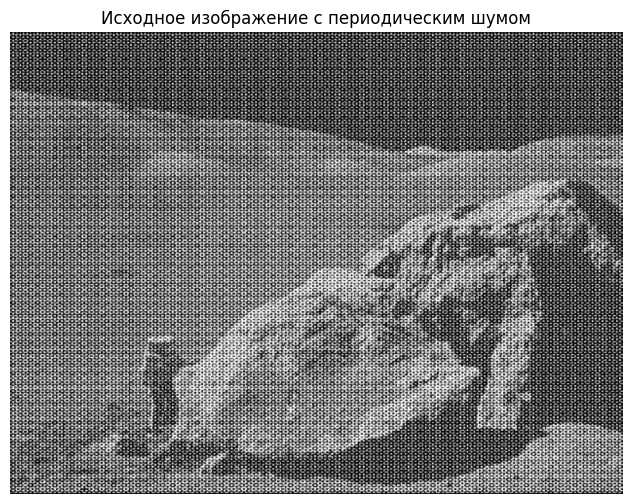

In [3]:
# Загрузка изображения
path = r'C:\\Users\\engfile\\image_processing\\dz5\\periodic_noise.JPG'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Не удалось открыть изображение. Проверь путь к файлу!")

plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')
plt.title("Исходное изображение с периодическим шумом")
plt.axis('off')
plt.show()

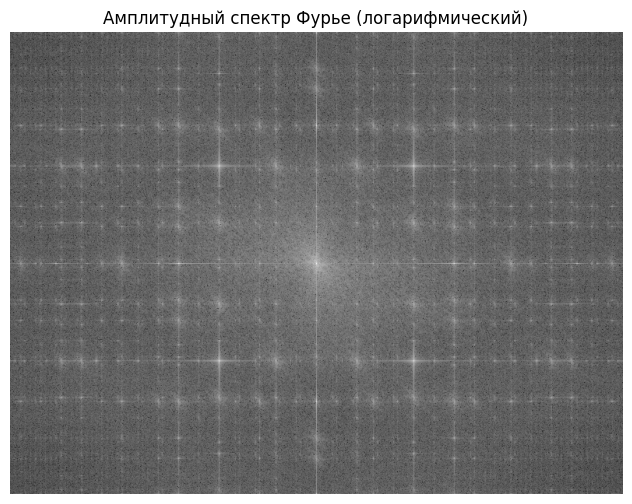

На спектре видны яркие точки - это частоты периодического шума


In [4]:
# Прямое преобразование Фурье
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(8, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Амплитудный спектр Фурье (логарифмический)")
plt.axis('off')
plt.show()

print("На спектре видны яркие точки - это частоты периодического шума")

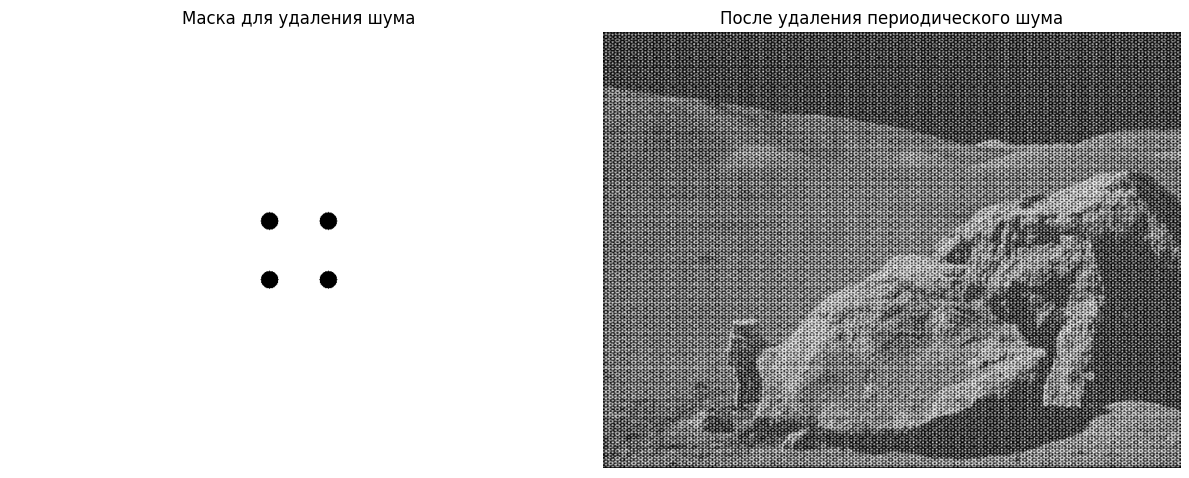

In [5]:
# Создание маски для удаления шума
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)

# Радиусы "дыр" для удаления частот шума
r = 12   # радиус выреза
d = 40   # смещение от центра (частота шума)

# Удаляем частоты шума (4 точки вокруг центра)
for dy in [-d, d]:
    for dx in [-d, d]:
        cv2.circle(mask, (ccol + dx, crow + dy), r, 0, -1)

# Применяем маску
fshift_filtered = fshift * mask

# Обратное преобразование Фурье
f_ishift = np.fft.ifftshift(fshift_filtered)
img_filtered = np.fft.ifft2(f_ishift)
img_filtered = np.abs(img_filtered)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Маска для удаления шума")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtered, cmap='gray')
plt.title("После удаления периодического шума")
plt.axis('off')

plt.tight_layout()
plt.show()

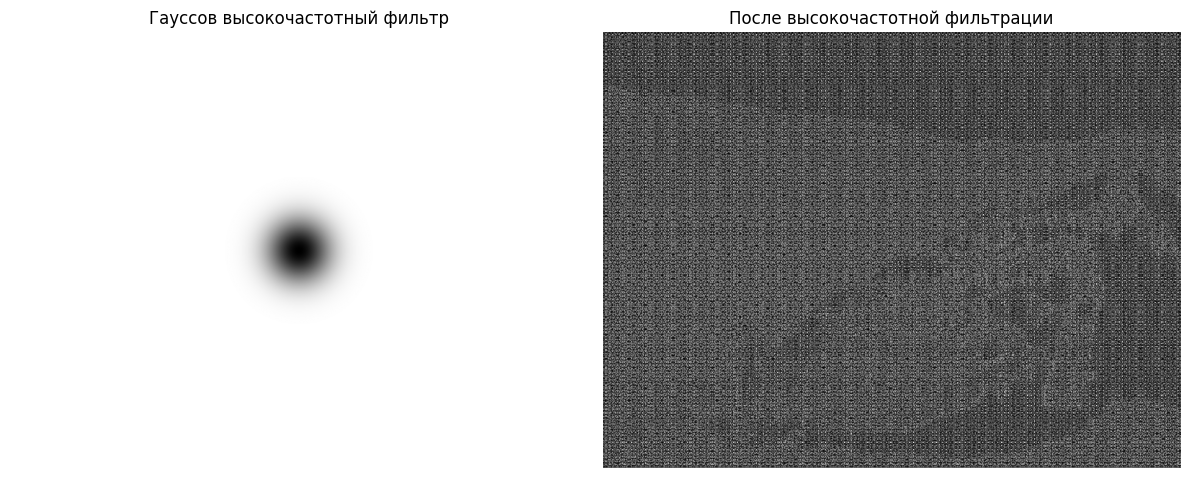

In [ ]:
# Создание Гауссова высокочастотного фильтра
def gaussian_highpass_filter(shape, sigma=30):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    
    # Создаем Гауссов НЧ фильтр
    x = np.arange(0, cols) - ccol
    y = np.arange(0, rows) - crow
    X, Y = np.meshgrid(x, y)
    d = np.sqrt(X**2 + Y**2)
    gaussian_lowpass = np.exp(-(d**2) / (2 * sigma**2))
    
    # Преобразуем в ВЧ фильтр
    gaussian_highpass = 1 - gaussian_lowpass
    return gaussian_highpass

# Применяем Гауссов ВЧ фильтр
highpass_filter = gaussian_highpass_filter(img.shape, sigma=30)

# Преобразование Фурье для ВЧ фильтрации
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Применяем ВЧ фильтр
fshift_highpass = fshift * highpass_filter

# Обратное преобразование
f_ishift_highpass = np.fft.ifftshift(fshift_highpass)
img_highpass = np.fft.ifft2(f_ishift_highpass)
img_highpass = np.abs(img_highpass)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(highpass_filter, cmap='gray')
plt.title("Гауссов высокочастотный фильтр")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_highpass, cmap='gray')
plt.title("После высокочастотной фильтрации")
plt.axis('off')

plt.tight_layout()
plt.show()